# 1. Tensiométrie : Plaque de Wilhelmy

On mesure une force qui est proportionnelle à la tension de surface.
$$F = p\gamma$$

Mesures obtenues par l'expérimentateur 

$$p = 2\pi D_{moy}$$ 

$$D_{moy} = (D_{int} + D_{ext})/2$$

$$\gamma = \frac{m\times 10^{-3}}{p}~mN/m$$ 
On en tire la valeur moyenne et déviation standard
$$\langle\gamma\rangle = mean(\gamma)$$

## 1.1 pour de l'eau distillée à 21$^\circ$ C

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression 
import pandas as pd
import matplotlib
# le module scikit
def setMathtextFont(fontName='Helvetica', texFontFamilies=None):
    texFontFamilies = ['it','rm','tt','bf','cal','sf'] if texFontFamilies is None else texFontFamilies

    matplotlib.rcParams.update({'mathtext.fontset': 'custom'})
    for texFontFamily in texFontFamilies:
        matplotlib.rcParams.update({('mathtext.%s' % texFontFamily): fontName})

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# Dint = 1.7E-2 # m
# Dext = 1.9E-2 # m
# Dmoy = (Dint + Dext)/2
Dmoy = 19.5E-3 # mm
print(Dmoy)
p = 2*np.pi*Dmoy
print(p)
m = [790, 795, 810, 780, 785, 800, 830, 805, 770] # mg
gamma = [np.round(i*10E-3/p,1) for i in m] # mN/m
print(gamma)
gamma_mean = np.mean(gamma)
print(gamma_mean)
gamma_std = np.std(gamma)
print(gamma_std)

0.0195
0.12252211349000193
[64.5, 64.9, 66.1, 63.7, 64.1, 65.3, 67.7, 65.7, 62.8]
64.97777777777777
1.3611904738767613


## 1.2. Pour de l'éthanol à 21$^\circ$ C

In [41]:
m = [285, 275, 275, 260, 260, 265, 275] # mg
gamma = [np.round(i*10E-3/p,1) for i in m] # mN/m
print(gamma)
gamma_mean = np.mean(gamma)
print(gamma_mean)
gamma_std = np.std(gamma)
print(gamma_std)

[23.3, 22.4, 22.4, 21.2, 21.2, 21.6, 22.4]
22.071428571428573
0.7145713714514171


## 1.3. Pour l'éthanol à 17.6 degrés

In [42]:
Dmoy = 19.5E-3 # mm
print(Dmoy)
p = 2*np.pi*Dmoy
print(p)
m = [262, 265, 268, 275, 260] # mg
gamma  = 

SyntaxError: invalid syntax (3289494905.py, line 6)

# 2. Loi de Jurin

$$h = \dfrac{2\gamma}{\rho g \alpha x}$$
L'idée est de mesurer la hauteur du liquide en fonction du rayon du capillaire et d'en déduire la valeur de la tension superficielle

(array([0.02182208, 0.00334219]), array([[1.66685999e-09, 1.01670117e-09],
       [1.01670117e-09, 6.89215367e-10]]))
0.0218


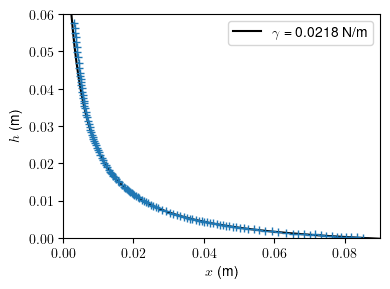

In [111]:
gamma_attendu = 23.9 # mN/m
ugamma = 0.75
rho = 789 # kg/m3
g = 9.81 # m/s2
alpha =1.53E-2 # rad
df = pd.read_csv('JurinCoin_montage071222.csv', sep = ';')
h = df['h'] # m
uh = df['uh'] # m
x = df['xnew'] # m
plt.figure(figsize=(4,3))
# plt.plot(x,h, '+')
plt.errorbar(x,h,yerr=uh, fmt='+')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$h$ (m)')
# scipy 
def jurin(x, ga, x0): 
    return -4.18E-3+2*ga/(rho*g*alpha*(x+x0))
params = curve_fit(jurin, x[25:], h[25:])
# plt.plot(x,invx(x,23E-3,0,1))
print(params)
ga = np.round(params[0][0],4)
x0 = params[0][1]
# h0 = params[2]
print(ga)
abscisse = np.linspace(0,90E-3,1000)
labelfit = r"$\gamma$ = " + str(ga) + " N/m"
plt.plot(abscisse,jurin(abscisse,ga,x0),color='k', label = labelfit)
plt.legend()
plt.axis([0, 90E-3, 0, 0.06])
plt.tight_layout()
plt.savefig('LoiDeJurin.png', dpi =300)

plt.show()
# gamma_mesure = ga
# print(r"gamma = " + str(gamma_mesure) + "  N/m")


[0.0239]
gamma = 0.0239 N/m


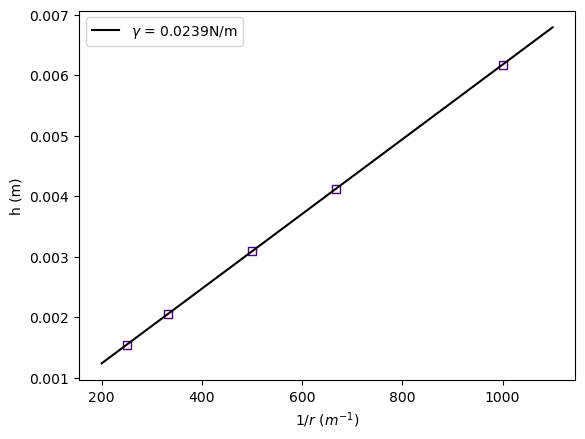

In [99]:
plt.figure()
plt.plot(invr,h, 's', color = 'indigo', mfc = 'none')
plt.xlabel(r'$1/r~ (m^{-1})$')
plt.ylabel(r'h (m)')

# modelisation

# scipy 
def lineaire(x, a): 
    return 2*a*x/rho/g
params, covs = curve_fit(lineaire, invr, h)
print(params)
a = np.round(params[0],8)
#b= np.round(params[1],8)

abscisse = np.linspace(200,1100,10000)
labelfit = r"$\gamma$ = " + str(a) + "N/m"
plt.plot(abscisse,lineaire(abscisse,a),color='k', label = labelfit)
plt.legend()

gamma_mesure = g
print(r"gamma = " + str(gamma_mesure) + " N/m")

# 3. Instabilité de Rayleigh Taylor


$$L = 2\pi \sqrt{\frac{\gamma}{\Delta\rho g}}$$

On mesure L et on compare à L attendu 

In [ ]:
$L_{huile d'olive} = 1.12E-2~m$
$L_{eau pure} = $